# Binary Image CLassification with Data Augmentation (cats_vs_dogs)

## Preparing Dataset

In [1]:
# ## Get the dataset from Kaggle - https://www.kaggle.com/c/dogs-vs-cats/data OR
# !wget --no-check-certificate \
#   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#   -O Dataset/cats_vs_dogs.zip

In [2]:
import os
import zipfile

DATASET_DIR = 'Dataset'
DATASET_ZIP = 'Dataset/cats_vs_dogs.zip'
BASE_DIR = 'Dataset/cats_vs_dogs'

if not os.path.isdir(BASE_DIR):
    os.makedirs(BASE_DIR)
    
    with zipfile.ZipFile(DATASET_ZIP, 'r') as zipref:
        zipref.extractall(BASE_DIR)
    
BASE_DIR = os.path.join(BASE_DIR, 'cats_and_dogs_filtered')
os.listdir(BASE_DIR)

['train', 'validation', 'vectorize.py']

## Config

In [3]:
def total_count(DIR):
    cat = DIR.split('/')[-1]
    print(f"Total number of data in *{cat}* is: {len(os.listdir(DIR))}")

TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALID_DIR = os.path.join(BASE_DIR, 'validation')
TRAIN_CATS_DIR = os.path.join(TRAIN_DIR, 'cats')
total_count(TRAIN_CATS_DIR)
VALID_CATS_DIR = os.path.join(VALID_DIR, 'cats')
total_count(VALID_CATS_DIR)
TRAIN_DOGS_DIR = os.path.join(TRAIN_DIR, 'dogs')
total_count(TRAIN_DOGS_DIR)
VALID_DOGS_DIR = os.path.join(VALID_DIR, 'dogs')
total_count(VALID_DOGS_DIR)

Total number of data in *cats* is: 1000
Total number of data in *cats* is: 500
Total number of data in *dogs* is: 1000
Total number of data in *dogs* is: 500


## Visualizing Examples

<Figure size 432x288 with 0 Axes>

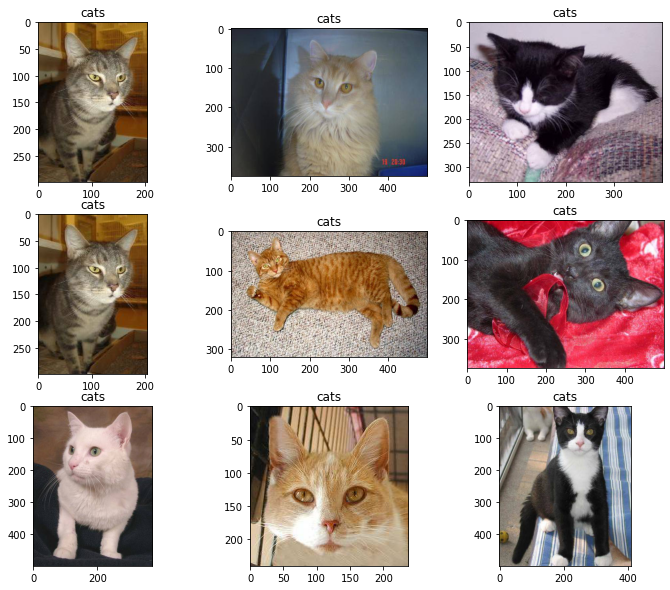

In [5]:
plot_samples(TRAIN_CATS_DIR)    

<Figure size 432x288 with 0 Axes>

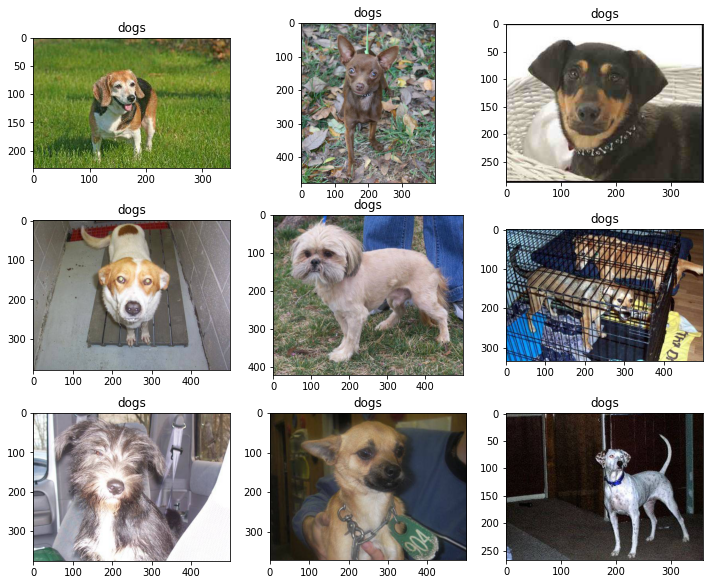

In [6]:
plot_samples(TRAIN_DOGS_DIR)    

## Build Model

In [7]:
import tensorflow as tf

In [8]:
def BINARY_CLASSIFIER_MODEL():
    ## Building
    inputs = tf.keras.Input(shape=(150,150,3))
    x1 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(inputs)
    x2 = tf.keras.layers.MaxPool2D((2,2))(x1)
    x3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x2)
    x4 = tf.keras.layers.MaxPool2D((2,2))(x3)
    x5 = tf.keras.layers.Flatten()(x4)
    x6 = tf.keras.layers.Dense(256, activation='relu')(x5)
    x7 = tf.keras.layers.Dense(128, activation='relu')(x6)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x7)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs) 

    return model

In [9]:
## Model
model = BINARY_CLASSIFIER_MODEL()
## Compiling Model
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

/home/raoof/Documents/2021/ml_projects/venv/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 165888)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               424675

## Image Generators

In [11]:
## Data Augemntation
TRAIN_DATA_GENERATOR = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,
                                                                       rotation_range=20,
                                                                       width_shift_range=20,
                                                                      height_shift_range=20,
                                                                       shear_range=20,
                                                                       zoom_range=10,
                                                                       fill_mode='nearest')
VALID_DATA_GENERATOR = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

In [12]:
TRAIN_DATA_GEN = TRAIN_DATA_GENERATOR.flow_from_directory(
                    TRAIN_DIR,
                    target_size=(150,150),
                    color_mode='rgb',
                    class_mode='binary',
                    batch_size=32,
                    shuffle=True,
                    seed=123
            )

VALID_DATA_GEN = VALID_DATA_GENERATOR.flow_from_directory(
                    VALID_DIR,
                    target_size=(150,150),
                    color_mode='rgb',
                    class_mode='binary',
                    batch_size=32,
                    shuffle=False,
                    seed=123
            )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Training

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_acc', patience=5, verbose=1, restore_best_weights=True
                )

In [14]:
history = model.fit(
            TRAIN_DATA_GEN,
            batch_size=20,
            epochs=40,
            verbose=1,
            callbacks=[early_stopping],
            validation_data=VALID_DATA_GEN
            )

Epoch 1/40
63/63 [==============================] - 45s 707ms/step - loss: 1.1577 - acc: 0.5160 - val_loss: 0.6988 - val_acc: 0.5010
Epoch 2/40
63/63 [==============================] - 44s 691ms/step - loss: 0.7317 - acc: 0.5360 - val_loss: 0.6573 - val_acc: 0.5870
Epoch 3/40
63/63 [==============================] - 44s 694ms/step - loss: 0.6901 - acc: 0.5570 - val_loss: 0.6825 - val_acc: 0.5400
Epoch 4/40
63/63 [==============================] - 43s 686ms/step - loss: 0.6787 - acc: 0.5580 - val_loss: 0.6729 - val_acc: 0.5630
Epoch 5/40
63/63 [==============================] - 44s 689ms/step - loss: 0.6840 - acc: 0.5770 - val_loss: 0.6522 - val_acc: 0.6050
Epoch 6/40
63/63 [==============================] - 43s 689ms/step - loss: 0.6796 - acc: 0.5735 - val_loss: 0.6565 - val_acc: 0.5800
Epoch 7/40
63/63 [==============================] - 45s 713ms/step - loss: 0.6706 - acc: 0.5935 - val_loss: 0.6619 - val_acc: 0.5870
Epoch 8/40
63/63 [==============================] - 47s 749ms/step - 

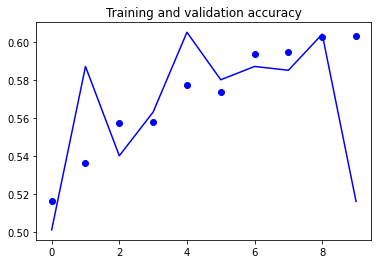

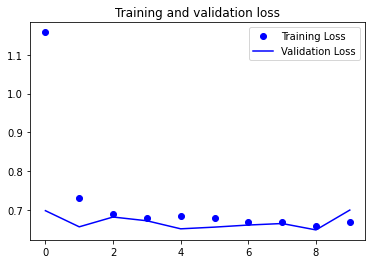

In [15]:
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, acc, 'bo', label='training accuracy')
plt.plot  ( epochs, val_acc, 'b', label='validation accuracy')
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs, loss, 'bo', label='Training Loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation Loss')
plt.title ('Training and validation loss')
plt.legend()

## Inference

In [16]:
def predict_image(image_path):
    image = tf.keras.preprocessing.image.load_img(
            image_path, color_mode='rgb', target_size=(150,150))
    
    image_array = np.asarray(image)
    image_array = np.expand_dims(image_array, axis=0)
    out = model.predict(image_array)
    if out < 0.5:
        res = "cat"
    else:
        res = "dog"
    print(f"Image is: {res}")
    
    

In [17]:
test_img_path = "Dataset/cats_vs_dogs/cats_and_dogs_filtered/train/dogs/dog.4.jpg"
predict_image(test_img_path)

Image is: cat


## Cleanup

In [18]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)